<a href="https://colab.research.google.com/github/eunzzae/Study_DS/blob/main/17)_%EB%A7%88%ED%8A%B8_%EC%98%A4%ED%94%84%EB%9D%BC%EC%9D%B8_%EA%B5%AC%EB%A7%A4_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 마트 오프라인 구매 예측
>**목차**

* 문제상황 및 데이터 살펴보기  
* 문제해결 프로세스 정의  
1) 판매 추이 분석  
2) 변수별 매출 영향도 분석  
3) ML 활용 구매량 예측

In [1]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# # ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
# import os
# os.chdir('/content/drive/MyDrive/Colab Notebooks/part3_lecture_fastcampus/chapter17')
# # '/content/drive/MyDrive/Colab Notebooks/ ← 여기 경로까지는 본인의 경로 입력, part3_lecture_fastcampus/chapter17' ← 변경X
# os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 문제상황 및 데이터 살펴보기
---
>**시나리오**

```
A마트는 주52시간제에 운영으로 인하여 인력난을 겪고 있다. 주 당 판매량을 예측할 수 없기 때문에 근무 스케줄과 인력 운영을 효율적으로  
하기 힘든 상황이다. 대기업 마트가 아니기 때문에 방문자 수, 주차 대수 등 세세한 데이터를 수집할 수 없는 상황이다.
효율적인 인력 운영을 위해서 공공 데이터와 쉽게 구할 수 있는 데이터를 활용하여 주간 마트 판매량 예측을 통해 인력운영을 효율화 하고자 한다.
```  


>**데이터 살펴보기**

* 마케팅 캠페인 관련 데이터
* 데이터 명세 ⬇

|Store|Date|Weekly_Sales|Holiday_Flag|Temperature|Fuel_Price|CPI|Unemployment|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|상점ID|날짜|주간판매량|공휴일여부|온도|연료가격|소비자물가지수|실업률|

In [2]:
# Data read
import pandas as pd
bath = '/content/drive/MyDrive/[STUDY] 데이터사이언스/데이터분석/data/chapter17_마트 오프라인 구매 예측/'
df = pd.read_csv(bath + 'chapter17_offline_mart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## 문제해결 프로세스 정의
---
>**문제정의**

```
- 인력운영 비효율로 인한 운영 비용 상승
```

>**기대효과**

```
- 인력운영 효율화로 인한 운영 비용 절감
```

>**해결방안**

```
- 주간 판매량 예측을 통해 인력 운영 스케줄 조정
1) Data 전처리 및 판매 추이 Data 탐색
2) line plot 과 heatmap을 통한 판매량과 상관관계 분석
3) ML 알고리즘을 활용한 주간 판매량 예측
```

>**성과측정**

```
- 주간 판매량 예측량에 따른 스케줄 조정 후 운영 비용 모니터링
```

>**현업적용**

```
- 1주가 종료되면 차주 판매량을 예측하기 위한 공공데이터 및 내부 데이터 수립
- Data를 Model에 Input후 주간 판매량 추출
- 주간 판매량에 따라 인력 운영 계획 수립
```

## Session 1
## 판매 추이 분석

### Data 전처리
---

In [3]:
# Data shape
# 6,435 row, 8 col로 구성됨
print('df', df.shape)

df (6435, 8)


In [4]:
# Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
# Null 확인
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
# Outlier 확인
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
# 화씨온도 > 섭씨온도로 변환
df['Temperature']=(df['Temperature']-32)/1.8
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,5.727778,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,3.616667,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,4.405556,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,8.127778,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,8.055556,2.625,211.350143,8.106


In [8]:
df['Temperature'].describe()

count    6435.000000
mean       15.924324
std        10.247185
min       -18.922222
25%         8.588889
50%        17.038889
75%        23.855556
max        37.855556
Name: Temperature, dtype: float64

In [12]:
# date time 변경
import datetime
df['Date'] = pd.to_datetime(df['Date'], format= '%d-%m-%Y')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,5.727778,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,3.616667,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,8.055556,2.625,211.350143,8.106


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


### 판매 추이 분석
---

In [14]:
# 총 45개의 Store
len(df['Store'].unique())

45

In [15]:
df['Store'].nunique()

45

In [16]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,5.727778,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,3.616667,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,8.055556,2.625,211.350143,8.106


In [17]:
df = df.sort_values(by=['Date'])
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,5.727778,2.572,211.096358,8.106
1287,10,2010-02-05,2193048.75,0,12.411111,2.962,126.442065,9.765
5148,37,2010-02-05,536006.73,0,7.761111,2.572,209.852966,8.554
2288,17,2010-02-05,789036.02,0,-4.938889,2.666,126.442065,6.548
4147,30,2010-02-05,465108.52,0,3.916667,2.572,210.752605,8.324


In [18]:
df['Date'].min(), df['Date'].max()

(Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'))

In [19]:
# 1번 Store df
df1 = df[df['Store']==1].sort_values(by=['Date'])
df1.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,5.727778,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,3.616667,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,8.055556,2.625,211.350143,8.106
5,1,2010-03-12,1439541.59,0,14.327778,2.667,211.380643,8.106
6,1,2010-03-19,1472515.79,0,12.544444,2.720,211.215635,8.106
7,1,2010-03-26,1404429.92,0,10.805556,2.732,211.018042,8.106
8,1,2010-04-02,1594968.28,0,16.816667,2.719,210.820450,7.808
9,1,2010-04-09,1545418.53,0,18.811111,2.770,210.622857,7.808


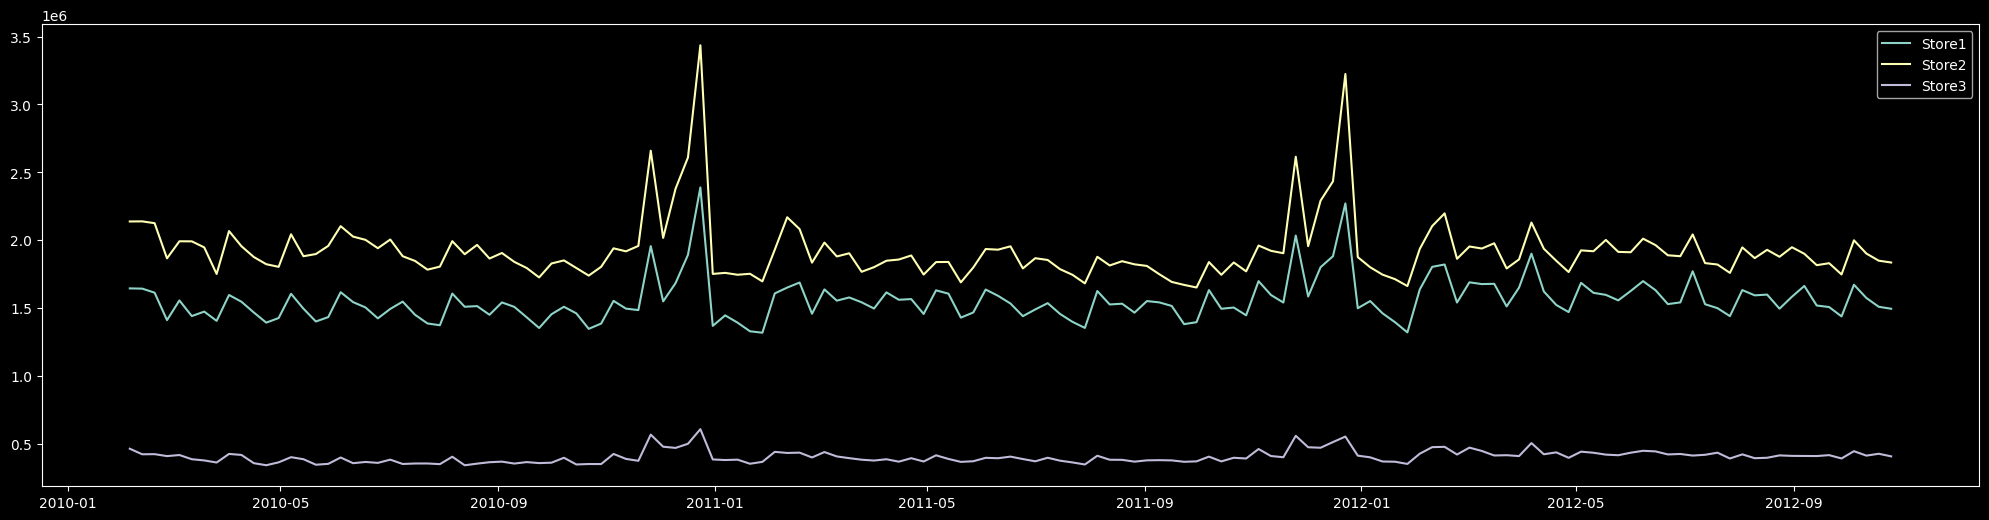

In [20]:
# Store별 판매량 수준 추이의 차이가 있기 때문에 독립적인 모델 생성 필요.
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

plt.plot(df1['Date'], df1['Weekly_Sales'], label='Store1');
plt.gcf().set_size_inches(25,6)

df2 = df[df['Store']==2].sort_values(by=['Date'])
plt.plot(df2['Date'], df2['Weekly_Sales'], label='Store2');
plt.gcf().set_size_inches(25,6)

df3 = df[df['Store']==3].sort_values(by=['Date'])
plt.plot(df3['Date'], df3['Weekly_Sales'], label='Store3');
plt.gcf().set_size_inches(25,6)

plt.legend();

In [21]:
import pandas as pd
df_concat = pd.DataFrame({'Date' : list(df1['Date']),
              'Store1_sales': list(df1['Weekly_Sales']),
              'Store2_sales': list(df2['Weekly_Sales']),
              'Store3_sales': list(df3['Weekly_Sales'])})
df_concat.head()

,Date,Store1_sales,Store2_sales,Store3_sales
0,2010-02-05,1643690.90,2136989.46,461622.22
1,2010-02-12,1641957.44,2137809.50,420728.96
2,2010-02-19,1611968.17,2124451.54,421642.19
3,2010-02-26,1409727.59,1865097.27,407204.86
4,2010-03-05,1554806.68,1991013.13,415202.04


## Session 2
## 변수별 매출 영향도 분석

### line plot - 상관관계 분석
---

In [22]:
df1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,5.727778,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,3.616667,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,8.055556,2.625,211.350143,8.106


In [23]:
# Holiday
df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

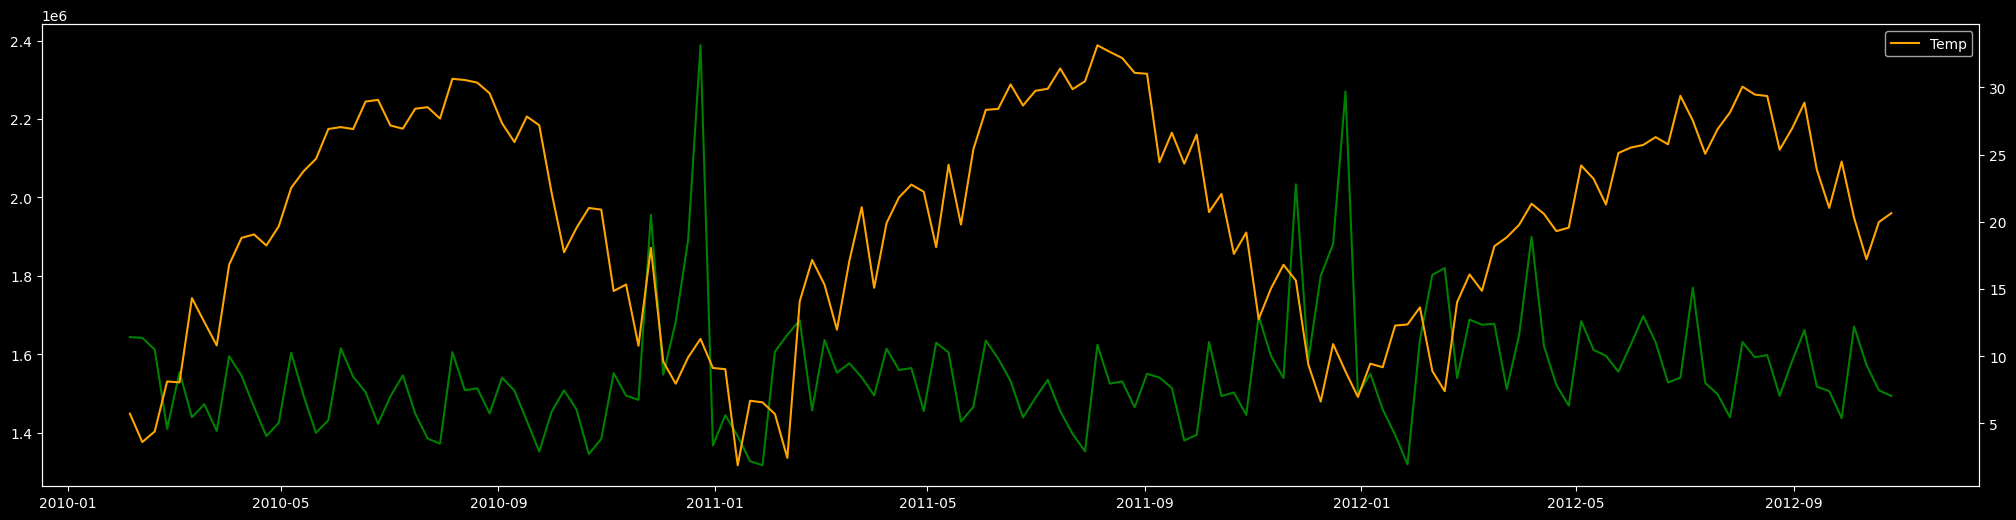

In [25]:
# 온도와 주간 판매량 => 온도가 올라가면 판매량이 적어지고 온도가 낮아지면 판매량이 증가하는 약소한 경향
fig, ax1 = plt.subplots()
ax1.plot(df1['Date'], df1['Weekly_Sales'], color='green', label='WeeklySales')

ax2 = ax1.twinx()
ax2.plot(df1['Date'], df1['Temperature'], color='orange', label='Temp')

plt.gcf().set_size_inches(25,6)
plt.legend();
plt.show()

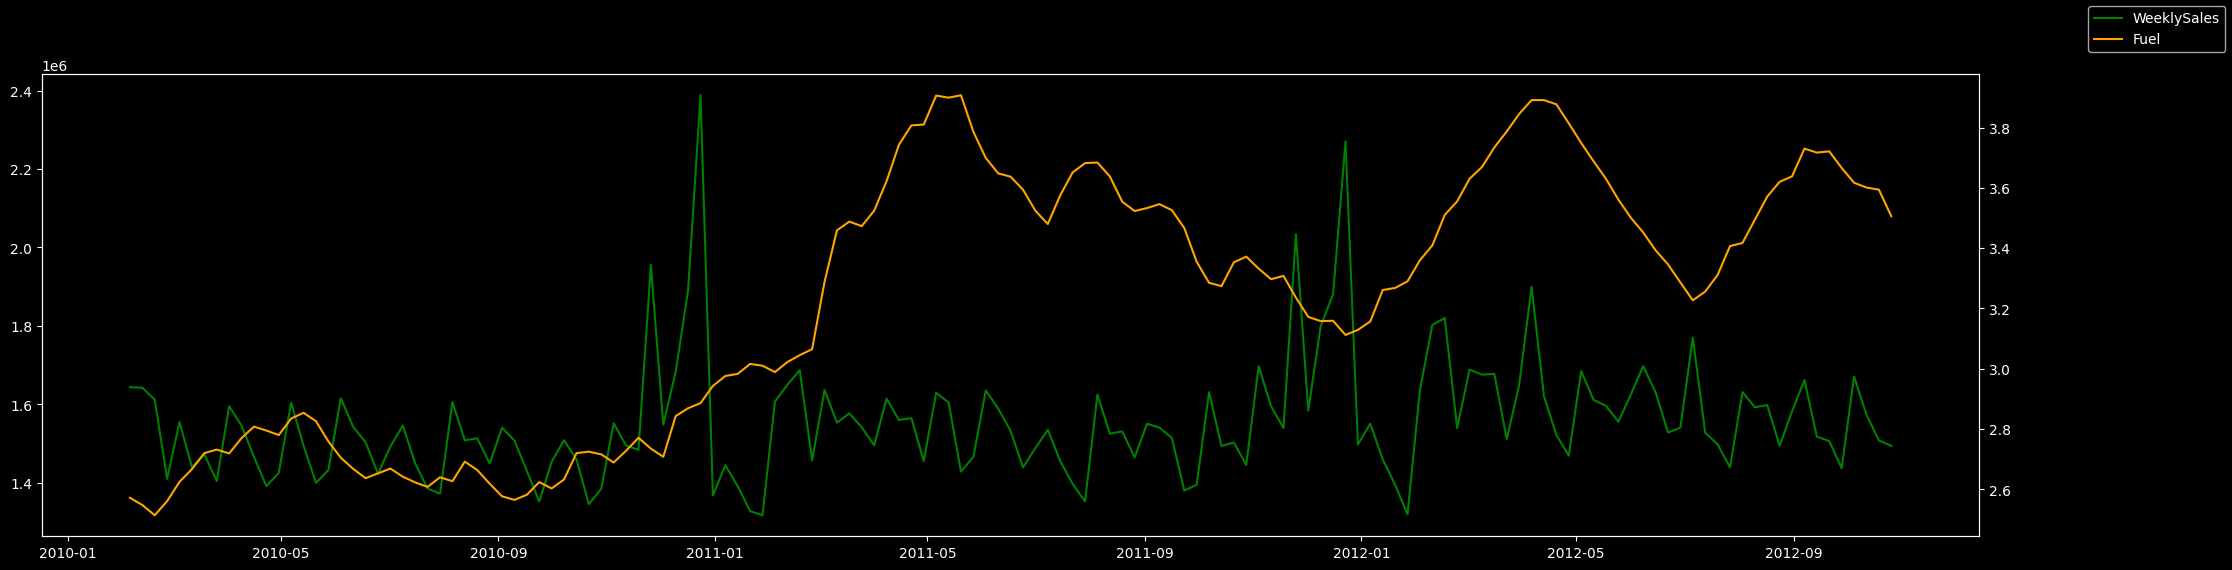

In [26]:
# 연료가격과 주간판매량
fig, ax1 = plt.subplots()
ax1.plot(df1['Date'], df1['Weekly_Sales'], color='green', label='WeeklySales')

ax2 = ax1.twinx()
ax2.plot(df1['Date'], df1['Fuel_Price'], color='orange', label='Fuel')

plt.gcf().set_size_inches(25,6)
fig.legend();
plt.show()

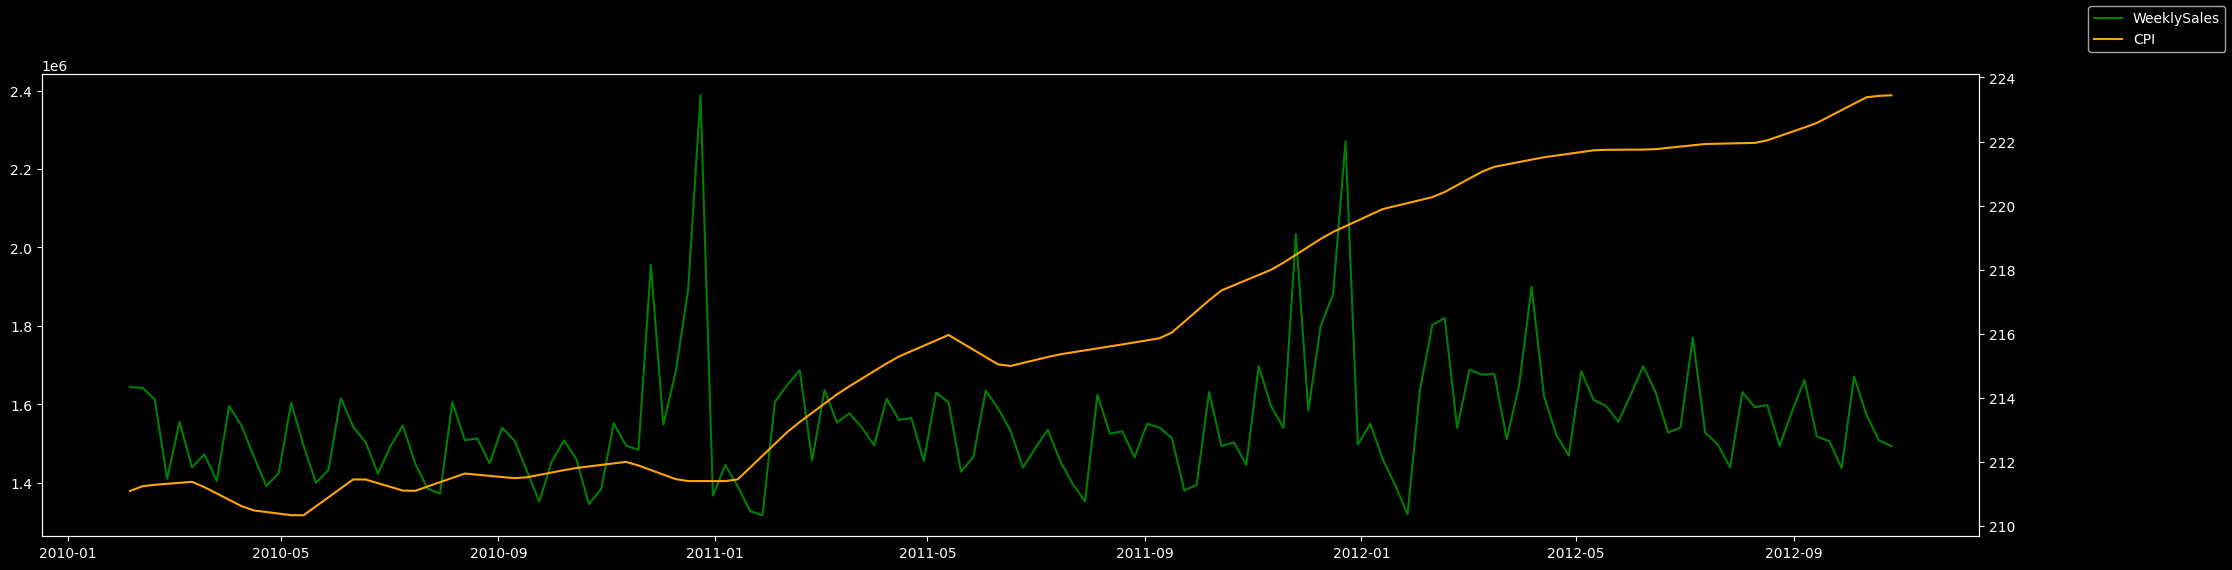

In [27]:
# CPI와 주간판매량
fig, ax1 = plt.subplots()
ax1.plot(df1['Date'], df1['Weekly_Sales'], color='green', label='WeeklySales')

ax2 = ax1.twinx()
ax2.plot(df1['Date'], df1['CPI'], color='orange', label='CPI')

plt.gcf().set_size_inches(25,6)
fig.legend();
plt.show()

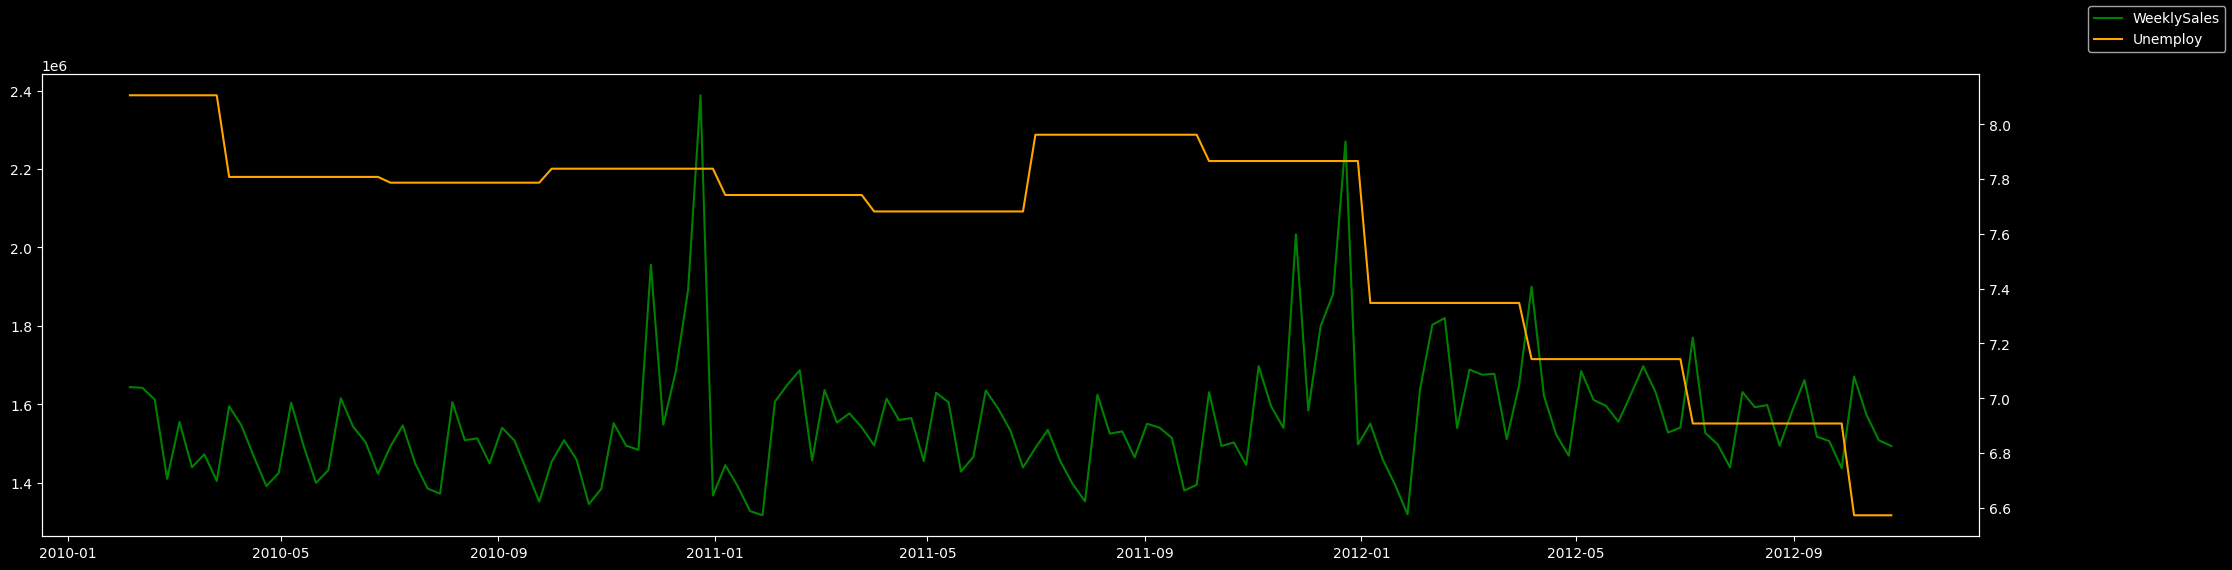

In [28]:
# 실업률과 주간판매량
fig, ax1 = plt.subplots()
ax1.plot(df1['Date'], df1['Weekly_Sales'], color='green', label='WeeklySales')

ax2 = ax1.twinx()
ax2.plot(df1['Date'], df1['Unemployment'], color='orange', label='Unemploy')

plt.gcf().set_size_inches(25,6)
fig.legend();
plt.show()

### heat map - 상관관계 분석
---

In [29]:
df1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,5.727778,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,3.616667,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,8.055556,2.625,211.350143,8.106


In [30]:
df_corr = df1.drop(['Store', 'Holiday_Flag','Date'], axis=1)
df_corr.corr()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.000000,-0.222701,0.124592,0.225408,-0.097955
Temperature,-0.222701,1.000000,0.228493,0.118503,-0.180695
Fuel_Price,0.124592,0.228493,1.000000,0.755259,-0.513944
CPI,0.225408,0.118503,0.755259,1.000000,-0.813471
Unemployment,-0.097955,-0.180695,-0.513944,-0.813471,1.000000


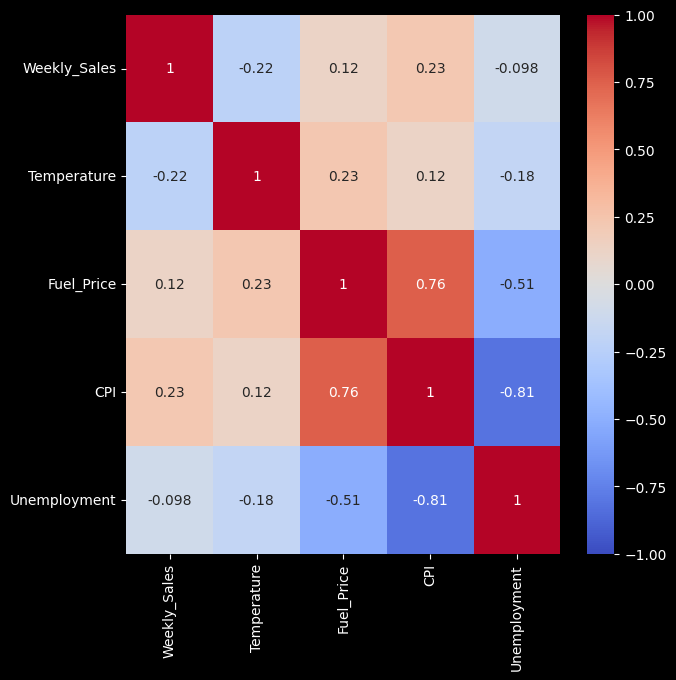

In [32]:
# 연속형 변수를 제외하고 Heat map 분석
df_corr = df1.drop(['Store', 'Holiday_Flag','Date'], axis=1)

sns.heatmap(df_corr.corr(), vmin=-1, vmax=+1, annot=True, cmap='coolwarm')
plt.gcf().set_size_inches(7,7)
plt.show()

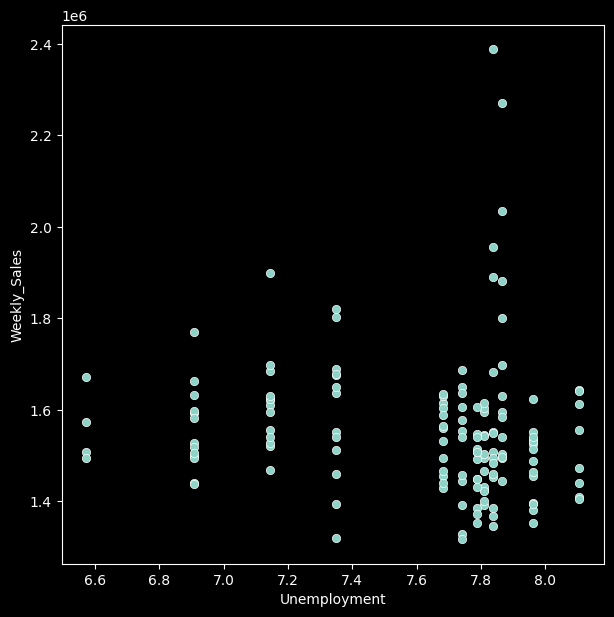

In [33]:
# Unemploymen와 주간판매량 간의 산점도
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df1);
plt.gcf().set_size_inches(7,7)
plt.show()

## Session 3
## ML 활용 구매량 예측

### 모델링을 위한 데이터 준비
---

In [34]:
df1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,5.727778,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,3.616667,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,8.055556,2.625,211.350143,8.106


In [35]:
# 날짜 데이터에서 월과 요일을 추출하여 새로운 파생 변수로 활용
df1['Dayofweek'] = df1['Date'].dt.dayofweek
df1['Month']=df1['Date'].dt.month

df1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Dayofweek,Month
0,1,2010-02-05,1643690.90,0,5.727778,2.572,211.096358,8.106,4,2
1,1,2010-02-12,1641957.44,1,3.616667,2.548,211.242170,8.106,4,2
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106,4,2
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106,4,2
4,1,2010-03-05,1554806.68,0,8.055556,2.625,211.350143,8.106,4,3


In [36]:
len(df1)

143

In [37]:
# 모델링을 학습하기 위한 X와 Y데이터 구분
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

X=df1.drop(['Store', 'Date', 'Weekly_Sales', 'CPI'], axis=1)
Y=df1['Weekly_Sales']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=1239)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(85, 6)
(85,)
(58, 6)
(58,)


###  모델 학습 및 평가
---

In [38]:
rfr = RandomForestRegressor(n_estimators=500, max_depth=4, random_state=1239)
rfr.fit(x_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=500, random_state=1239)

In [40]:
# 예측
# 예측은 학습에 사용된 Data와 Test Data 모두 예측하고 평가(과적합 여부 판별)

import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
y_pred_train = rfr.predict(x_train)
y_pred_test = rfr.predict(x_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
print('mae_train:', mae_train)
r2_train = r2_score(y_train, y_pred_train)
print('r2_train:', r2_train)
print('')
mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test:', mae_test)
r2_test = r2_score(y_test, y_pred_test)
print('r2_test:', r2_test)

mae_train: 64893.74213161644
r2_train: 0.6430500989188902

mae_test: 95725.46992720911
r2_test: 0.22772920123985674


In [42]:
# 다항회귀, 성능이 좋진 않음
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2, include_bias=True)

X_train_poly = poly.fit_transform(x_train)

lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

X_test_poly = poly.transform(x_test)

y_pred_test = lin_reg.predict(X_test_poly)

mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)

r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_test(mae):  101443.77704378885
r2_score(r2):  0.16303378436940774


In [43]:
# e10, 표현을 숫자로 변경
pd.options.display.float_format = '{:.2f}'.format

result = pd.DataFrame({'Real Values':y_test, 'Predicted Values': y_pred_test})
result['diff'] = result['Real Values'] - result['Predicted Values']
result.head()

,Real Values,Predicted Values,diff
142,1493659.74,1498839.65,-5179.91
43,1548033.78,1599718.27,-51684.49
29,1449142.92,1481750.63,-32607.71
21,1492418.14,1488577.63,3840.51
77,1352219.79,1464768.61,-112548.82


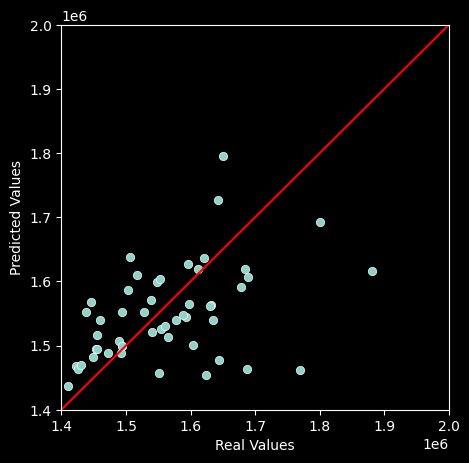

In [46]:
# xlim과 ylim을 조정해서 선형 Fitting이 잘되는지 확인.
sns.scatterplot(x=result['Real Values'], y=result['Predicted Values'])
plt.xlim(1400000, 2000000)
plt.ylim(1400000, 2000000)

x = [1400000, 2000000]
y = [1400000, 2000000]
plt.plot(x, y, 'r')
plt.gcf().set_size_inches(5,5)
plt.show()

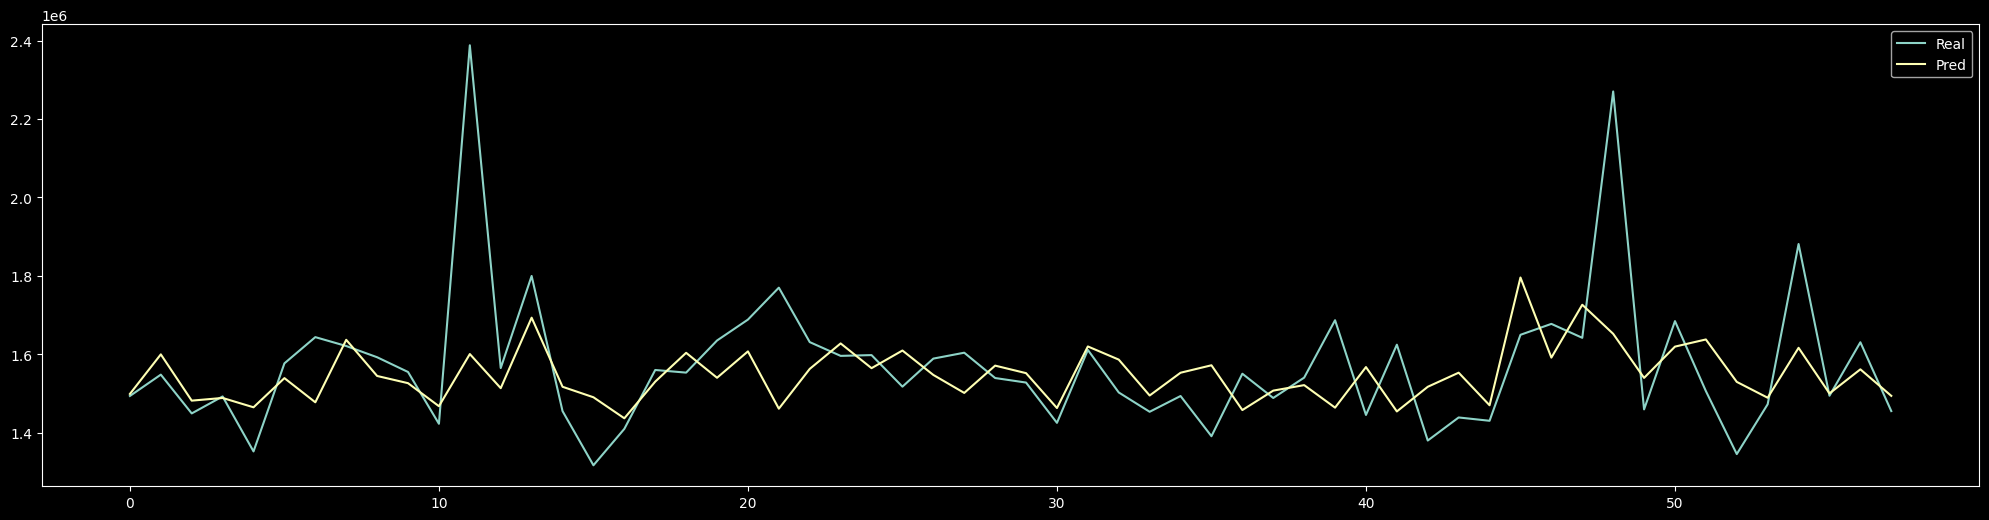

In [47]:
# 실제값과 예측값 Plotting, peak를 맞추지 못함
result = result.reset_index(drop=True)

plt.plot(result.index, result['Real Values'], label='Real');
plt.plot(result.index, result['Predicted Values'], label='Pred');
plt.legend()
plt.gcf().set_size_inches(25,6)
plt.show()

### 중요변수 파악
---

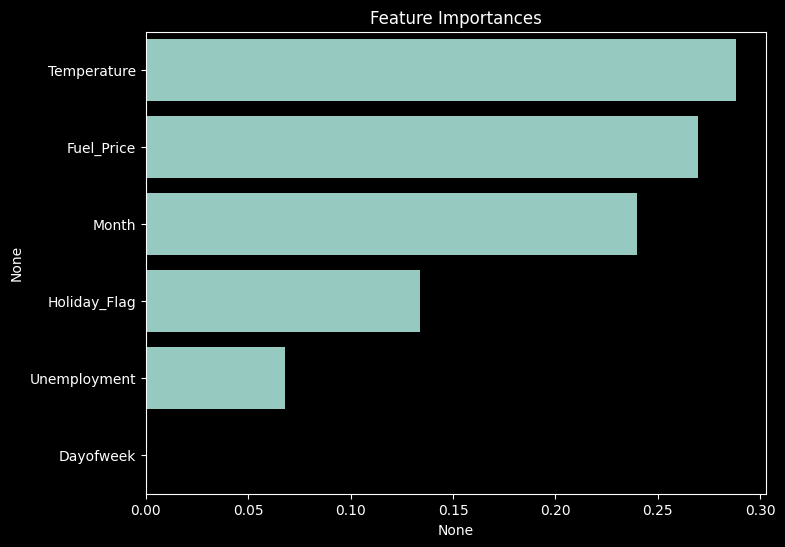

In [48]:
ftr_importances_values = rfr.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [52]:
df1.groupby('Month')['Weekly_Sales'].mean().sort_values(ascending=False)

Month
12   1790954.79
11   1668814.99
2    1625442.21
3    1567743.60
6    1561510.46
8    1547581.41
4    1544510.02
5    1542111.07
10   1497581.29
9    1487055.21
7    1479006.00
1    1400467.69
Name: Weekly_Sales, dtype: float64

### 모델 저장

In [ ]:
import pickle
# 모델 저장
saved_model = pickle.dumps(rfr)

# 모델 Read
rfr_from_pickle = pickle.loads(saved_model)